The detailed description of the dataset is given in the below link:
https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
from apyori import apriori

In [ ]:
df=pd.read_excel("/content/Absenteeism_at_work.xls")
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,2


In [ ]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [ ]:
df.isna().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   ID                               740 non-null    int64
 1   Reason for absence               740 non-null    int64
 2   Month of absence                 740 non-null    int64
 3   Day of the week                  740 non-null    int64
 4   Seasons                          740 non-null    int64
 5   Transportation expense           740 non-null    int64
 6   Distance from Residence to Work  740 non-null    int64
 7   Service time                     740 non-null    int64
 8   Age                              740 non-null    int64
 9   Work load Average/day            740 non-null    int64
 10  Hit target                       740 non-null    int64
 11  Disciplinary failure             740 non-null    int64
 12  Education                        740 non-null    i

In [ ]:
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271490.235135,94.587838,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39058.116188,3.779313,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294217.000000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [ ]:
df=df.drop(columns=["ID"])
x=df.columns
ms = MinMaxScaler()
X = ms.fit_transform(df)
v=X
X

array([[0.92857143, 0.58333333, 0.25      , ..., 0.27272727, 0.57894737,
        0.03333333],
       [0.        , 0.58333333, 0.25      , ..., 0.45454545, 0.63157895,
        0.        ],
       [0.82142857, 0.58333333, 0.5       , ..., 0.21212121, 0.63157895,
        0.01666667],
       ...,
       [0.        , 0.        , 0.25      , ..., 0.21212121, 0.78947368,
        0.        ],
       [0.        , 0.        , 0.5       , ..., 0.21212121, 0.84210526,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.36363636, 0.31578947,
        0.        ]])

In [ ]:
X = pd.DataFrame(X, columns=[x])
X

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,0.928571,0.583333,0.25,0.000000,0.633333,0.659574,0.428571,0.193548,0.194471,0.842105,0.0,0.000000,0.50,1.0,0.0,0.125,0.653846,0.272727,0.578947,0.033333
1,0.000000,0.583333,0.25,0.000000,0.000000,0.170213,0.607143,0.741935,0.194471,0.842105,1.0,0.000000,0.25,1.0,0.0,0.000,0.807692,0.454545,0.631579,0.000000
2,0.821429,0.583333,0.50,0.000000,0.225926,0.978723,0.607143,0.354839,0.194471,0.842105,0.0,0.000000,0.00,1.0,0.0,0.000,0.634615,0.212121,0.631579,0.016667
3,0.250000,0.583333,0.75,0.000000,0.596296,0.000000,0.464286,0.387097,0.194471,0.842105,0.0,0.000000,0.50,1.0,1.0,0.000,0.230769,0.151515,0.263158,0.033333
4,0.821429,0.583333,0.75,0.000000,0.633333,0.659574,0.428571,0.193548,0.194471,0.842105,0.0,0.000000,0.50,1.0,0.0,0.125,0.653846,0.272727,0.578947,0.016667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,0.500000,0.583333,0.25,0.000000,0.633333,0.659574,0.428571,0.193548,0.339296,0.631579,0.0,0.000000,0.50,1.0,0.0,0.125,0.653846,0.272727,0.578947,0.066667
736,0.392857,0.583333,0.25,0.000000,0.433333,0.127660,0.464286,0.322581,0.339296,0.631579,0.0,0.666667,0.25,0.0,0.0,0.125,0.615385,0.272727,0.526316,0.033333
737,0.000000,0.000000,0.25,0.000000,0.000000,0.191489,0.428571,0.419355,0.377540,0.736842,0.0,0.000000,0.25,1.0,0.0,1.000,0.807692,0.212121,0.789474,0.000000
738,0.000000,0.000000,0.50,0.333333,0.418519,0.638298,0.464286,0.387097,0.377540,0.736842,0.0,0.000000,0.50,1.0,0.0,0.250,0.846154,0.212121,0.842105,0.000000


Dendrogram Before Clustering

<Figure size 1080x1080 with 0 Axes>

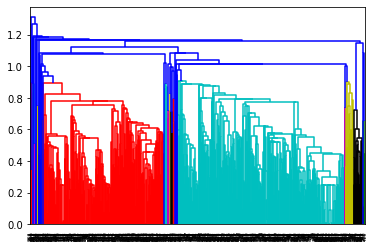

<Figure size 1080x1080 with 0 Axes>

In [ ]:
t=hierarchy.linkage(v,'single')
dendrogram(t)
plt.figure(figsize=(15,15))

In [ ]:
av = AgglomerativeClustering(distance_threshold=0, n_clusters=None,linkage = "average",affinity='euclidean')
t=av.fit(v)
val=av.fit_predict(v)
val

array([588, 667, 689, 489, 558, 739, 554, 525, 429, 461, 585, 491, 631,
       550, 468, 563, 647, 531, 419, 450, 377, 467, 675, 623, 600, 670,
       676, 425, 707, 476, 617, 389, 426, 587, 653, 551, 669, 403, 601,
       502, 431, 703, 704, 549, 434, 674, 420, 597, 553, 470, 449, 552,
       604, 657, 466, 543, 603, 654, 663, 681, 658, 556, 648, 726, 444,
       519, 578, 656, 640, 694, 398, 494, 438, 421, 411, 401, 711, 649,
       586, 613, 546, 724, 274, 582, 690, 695, 616, 733, 451, 383, 684,
       443, 607, 497, 430, 510, 405, 490, 523, 337, 679, 517, 326, 671,
       709, 723, 611, 378, 655, 574, 407, 687, 615, 644, 533, 698, 677,
       634, 717, 570, 618, 718, 643, 719, 720, 721, 581, 458, 568, 522,
       501, 516, 542, 520, 685, 402, 432, 475, 725, 428, 275, 646, 244,
       477, 390, 534, 452, 292, 386, 509, 564, 250, 625, 614, 496, 387,
       487, 445, 404, 200, 406, 565, 481, 384, 361, 371, 635, 507, 376,
       224, 474, 424, 608, 373, 541, 580, 392, 514, 433, 599, 37

Dendrogram after clustering

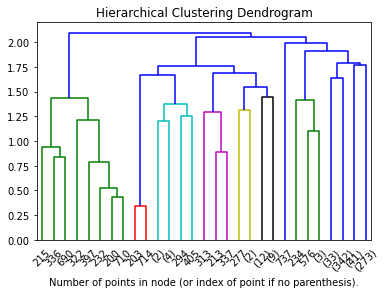

In [ ]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(av, truncate_mode='level', p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

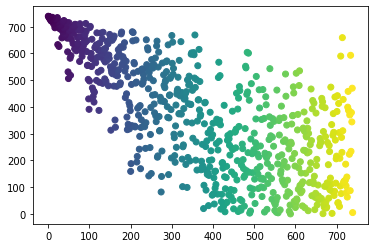

In [ ]:
l=range(len(val))
plt.scatter(val,l,c=val)